## Classificação de variáveis

### Importando as bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from slugify import slugify
from sklearn.model_selection import train_test_split
import Levenshtein
#from iowalicor.data.preprocessing import slugify
#from application.app.folder.file import func_name

In [6]:
df_firstn = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", nrows=10)
df_firstn

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
5,S28869200001,11/11/2015,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47,Ida,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,1,$53.34,1.75,0.46
6,S28865700001,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7,Black Hawk,...,238,Forbidden Secret Coffee Pack,6,1500,$11.62,$17.43,6,$104.58,9.00,2.38
7,S28869500001,11/10/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86,Tama,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,2,$106.68,3.50,0.92
8,S29339300091,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70,Muscatine,...,173,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,4,$117.48,3.00,0.79
9,S29050900001,11/16/2015,4307,Crossroads Wine and Liquor,117 IOWA AVE,DUNLAP,712-2,"117 IOWA AVE\nDUNLAP 712-2\n(41.854728, -95.60...",43,Harrison,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [20]:
df_firstn['Volume Sold (Gallons)'].head(20)

0    1.19
1    2.38
2    0.08
3    1.39
4    0.08
5    0.46
6    2.38
7    0.92
8    0.79
9    0.08
Name: Volume Sold (Gallons), dtype: float64

## Análise exploratória dataset Iowa_Liquor_Sales

In [13]:
#req_cols=['Date','City','County','Item Description','State Bottle Cost','State Bottle Retail','Volume Sold (Liters)']

### Lendo o dataset e atribuindo a uma variável

In [29]:
#df = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", usecols=req_cols)
dataset = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv",parse_dates=['Date'],dtype={
    'Invoice/Item Number': str,
    'Store Number': float,
    'Store Name': str,
    'Address': str,
    'City': str,
    'Zip Code': str,
    'Store Location': str,
    'County Number': float,
    'County': str,
    'Category': float,
    'Category Name': str,
    'Vendor Number': float,
    'Vendor Name': str,
    'Item Number': float,
    'Item Description': str,
    'Pack': float,
    'Bottle Volume (ml)': int,
    'State Bottle Cost': str,
    'State Bottle Retail': str,
    'Bottles Sold': int,
    'Sale (Dollars)': str,
    'Volume Sold (Liters)': float,
    'Volume Sold (Gallons)': float
})

In [30]:
dataset.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,2015-11-20,2191.0,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297.0,Templeton Rye w/Flask,6.0,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,2015-11-21,2205.0,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297.0,Templeton Rye w/Flask,6.0,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,2015-11-16,3549.0,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249.0,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20.0,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,2015-11-04,2513.0,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237.0,Knob Creek w/ Crystal Decanter,3.0,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,2015-11-17,3942.0,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249.0,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20.0,150,$6.40,$9.60,2,$19.20,0.30,0.08


### Utilizando o train_test_split para dividir o dataset em dados

In [31]:
X = dataset
y = dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [33]:
df = pd.DataFrame(X_test)
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
7218066,S16096000036,2013-12-04,4011.0,Jim and Charlies Affiliated,121 NORTH CLINTON,ALBIA,52531,"121 NORTH CLINTON\nALBIA 52531\n(41.028308, -9...",68.0,Monroe,...,65066.0,Goldschlager Cinnamon Schnapps,12.0,750,$12.75,$19.13,3,$57.39,2.25,0.59
10449985,INV-01781900012,2016-11-28,5248.0,Liquor and Grocery Depot,"114, N Center St",Marshalltown,50158,"114, N Center St\nMarshalltown 50158\n(42.0516...",64.0,MARSHALL,...,65254.0,Jagermeister Liqueur,24.0,375,$6.52,$9.78,8,$9.78,3.00,0.79
2570121,S16904500016,2014-01-20,4970.0,Jeff's Market / West Liberty,"200, E 3RD ST",WEST LIBERTY,52776,"200, E 3RD ST\nWEST LIBERTY 52776\n(41.569916,...",70.0,Muscatine,...,32236.0,Seagrams Extra Dry Gin,12.0,750,$5.99,$8.99,1,$8.99,0.75,0.20
10247272,INV-01169000050,2016-10-25,2665.0,Hy-Vee / Waukee,1005 E Hickman Rd,Waukee,50263,"1005 E Hickman Rd\nWaukee 50263\n(41.615059, -...",25.0,DALLAS,...,34821.0,Svedka Vodka,6.0,1750,$14.74,$22.11,1,$132.66,1.75,0.46
3076965,S16476300116,2013-12-23,3818.0,Round Window Liquor,703 W PLEASANT ST,KNOXVILLE,50138,703 W PLEASANT ST\nKNOXVILLE 50138\n(41.320746...,63.0,Marion,...,43333.0,Captain Morgan Spiced Rum Pet,48.0,200,$2.01,$3.02,3,$9.06,0.60,0.16


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518216 entries, 7218066 to 7969365
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           float64       
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               object        
 7   Store Location         object        
 8   County Number          float64       
 9   County                 object        
 10  Category               float64       
 11  Category Name          object        
 12  Vendor Number          float64       
 13  Vendor Name            object        
 14  Item Number            float64       
 15  Item Description       object        
 16  Pack                   float64       
 17  Bottle Volume (ml)     int32         
 18  State Bottle Cos

In [50]:
df.to_csv('iowa_liquor_train_test_split_sample.csv')

In [40]:
df.columns = [slugify(col, lowercase=True, separator='_') for col in df.columns]
df.columns

Index(['invoice_item_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'store_location', 'county_number', 'county',
       'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [6]:
#df['city'] = slugify(str(df['city']))

### Substituindo os valores NaN da tabela para diminuir o tamanho do dataset

In [36]:
df.isnull().values.any()

True

In [37]:
for x in df.columns:
    df[x] = df[x].fillna('0')

In [38]:
df.isnull().values.any()

False

#### Verificando quantidade de cidades e condados:

In [55]:
cities = df['city'].unique().astype(str)

In [56]:
cities

array(['albia', 'marshalltown', 'west-liberty', 'waukee', 'knoxville',
       'sanborn', 'mason-city', 'sioux-city', 'spencer', 'davenport',
       'waterloo', 'sutherland', 'cedar-rapids', 'perry', 'arnold-s-park',
       'brooklyn', 'newton', 'vinton', 'camanche', 'dubuque',
       'des-moines', 'inwood', 'avoca', 'bettendorf', 'council-bluffs',
       'cherokee', 'onawa', 'milford', 'marion', 'iowa-city', 'urbandale',
       'laurens', 'west-des-moines', 'pleasant-hill', 'pocahontas',
       'johnston', 'grinnell', 'spirit-lake', 'washington', 'oskaloosa',
       'webster-city', 'cedar-falls', 'ames', 'sac-city', 'logan',
       'wilton', 'clive', 'sigourney', 'fort-dodge', 'burlington',
       'waukon', 'sergeant-bluff', 'ankeny', 'carroll', 'sloan',
       'winterset', 'coralville', 'toledo', 'muscatine', 'hudson',
       'red-oak', 'ottumwa', 'pella', 'earlham', 'guttenberg', 'altoona',
       'osceola', 'tiffin', 'decorah', 'glidden', 'clarinda', 'keokuk',
       'montezuma', 'm

In [46]:
df['city'] = df['city'].apply(slugify)

In [54]:
df.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
7218066,S16096000036,2013-12-04,4011.0,Jim and Charlies Affiliated,121 NORTH CLINTON,albia,52531,"121 NORTH CLINTON\nALBIA 52531\n(41.028308, -9...",68.0,MONROE,...,65066.0,GOLDSCHLAGER CINNAMON SCHNAPPS,12.0,750,$12.75,$19.13,3,$57.39,2.25,0.59
10449985,INV-01781900012,2016-11-28,5248.0,Liquor and Grocery Depot,"114, N Center St",marshalltown,50158,"114, N Center St\nMarshalltown 50158\n(42.0516...",64.0,MARSHALL,...,65254.0,JAGERMEISTER LIQUEUR,24.0,375,$6.52,$9.78,8,$9.78,3.00,0.79
2570121,S16904500016,2014-01-20,4970.0,Jeff's Market / West Liberty,"200, E 3RD ST",west-liberty,52776,"200, E 3RD ST\nWEST LIBERTY 52776\n(41.569916,...",70.0,MUSCATINE,...,32236.0,SEAGRAMS EXTRA DRY GIN,12.0,750,$5.99,$8.99,1,$8.99,0.75,0.20
10247272,INV-01169000050,2016-10-25,2665.0,Hy-Vee / Waukee,1005 E Hickman Rd,waukee,50263,"1005 E Hickman Rd\nWaukee 50263\n(41.615059, -...",25.0,DALLAS,...,34821.0,SVEDKA VODKA,6.0,1750,$14.74,$22.11,1,$132.66,1.75,0.46
3076965,S16476300116,2013-12-23,3818.0,Round Window Liquor,703 W PLEASANT ST,knoxville,50138,703 W PLEASANT ST\nKNOXVILLE 50138\n(41.320746...,63.0,MARION,...,43333.0,CAPTAIN MORGAN SPICED RUM PET,48.0,200,$2.01,$3.02,3,$9.06,0.60,0.16


In [57]:
#def distance(s1,s2):
    #if Levenshtein.distance(s1,s2) != 0:
        #return s1

In [58]:
len(cities)

417

In [59]:
counties = df['county'].unique().astype(str)

In [60]:
sorted(counties)

['0',
 'ADAIR',
 'ADAMS',
 'ALLAMAKEE',
 'APPANOOSE',
 'AUDUBON',
 'BENTON',
 'BLACK HAWK',
 'BOONE',
 'BREMER',
 'BUCHANAN',
 'BUENA VIST',
 'BUENA VISTA',
 'BUTLER',
 'CALHOUN',
 'CARROLL',
 'CASS',
 'CEDAR',
 'CERRO GORD',
 'CERRO GORDO',
 'CHEROKEE',
 'CHICKASAW',
 'CLARKE',
 'CLAY',
 'CLAYTON',
 'CLINTON',
 'CRAWFORD',
 'DALLAS',
 'DAVIS',
 'DECATUR',
 'DELAWARE',
 'DES MOINES',
 'DICKINSON',
 'DUBUQUE',
 'EMMET',
 'FAYETTE',
 'FLOYD',
 'FRANKLIN',
 'FREMONT',
 'GREENE',
 'GRUNDY',
 'GUTHRIE',
 'HAMILTON',
 'HANCOCK',
 'HARDIN',
 'HARRISON',
 'HENRY',
 'HOWARD',
 'HUMBOLDT',
 'IDA',
 'IOWA',
 'JACKSON',
 'JASPER',
 'JEFFERSON',
 'JOHNSON',
 'JONES',
 'KEOKUK',
 'KOSSUTH',
 'LEE',
 'LINN',
 'LOUISA',
 'LUCAS',
 'LYON',
 'MADISON',
 'MAHASKA',
 'MARION',
 'MARSHALL',
 'MILLS',
 'MITCHELL',
 'MONONA',
 'MONROE',
 'MONTGOMERY',
 'MUSCATINE',
 "O'BRIEN",
 'OBRIEN',
 'OSCEOLA',
 'PAGE',
 'PALO ALTO',
 'PLYMOUTH',
 'POCAHONTAS',
 'POLK',
 'POTTAWATTA',
 'POTTAWATTAMIE',
 'POWESHIEK',
 'R

In [63]:
len(counties)

104

In [64]:
df['county'] = df['county'].apply(slugify)

In [65]:
description = df['item_description'].unique()

In [66]:
df['item_description'] = df['item_description'].apply(slugify)

In [67]:
#"ARNOLD'S PARK"(certo),
#'ARNOLDS PARK',
#'GUTTENBERG'(certo),
#'GUTTENBURG',
#KELLOG',
#'KELLOGG'(certo),
    

### Parece que precisaremos realizar algum tipo de transformação nesses dados. Pode-se perceber que às vezes o nome da cidade ou condado aparece com nome maiúsculo e às vezes minusculo. por via das dúvidas iremos fazer isso com a descrição do item também. Isso influencia de alguma forma nossa análise.

### Temos também um problema com os condados de O'BRIEN e CERRO GORDO, pois algumas vezes ele aparece com ou sem a aspa simples

### Qual condado "OBRIEN" tem mais entradas? OBRIEN ou O'BRIEN?:

### Vamos retirar os cifrões do preço de custo e do preço de venda para facilitar futuras operações com esses números :

In [68]:
df['state_bottle_cost'] = df['state_bottle_cost'].replace({'\$':''}, regex = True)

In [69]:
df['state_bottle_retail'] = df['state_bottle_retail'].replace({'\$':''}, regex = True)

## Explorando o dataset:

#### Verificando formato dos dados:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518216 entries, 7218066 to 7969365
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   invoice_item_number  object        
 1   date                 datetime64[ns]
 2   store_number         float64       
 3   store_name           object        
 4   address              object        
 5   city                 object        
 6   zip_code             object        
 7   store_location       object        
 8   county_number        object        
 9   county               object        
 10  category             object        
 11  category_name        object        
 12  vendor_number        float64       
 13  vendor_name          object        
 14  item_number          float64       
 15  item_description     object        
 16  pack                 float64       
 17  bottle_volume_ml     int32         
 18  state_bottle_cost    object        
 19  state_bottle_re

#### Usando float16 para economizar memoria(float16 = máximo 32767):

In [74]:
df['volume_sold_liters'] = np.float16(df['volume_sold_liters'])

#### Transformando o os dados da coluna Date em formato datetime

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518216 entries, 7218066 to 7969365
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   invoice_item_number  object        
 1   date                 datetime64[ns]
 2   store_number         float64       
 3   store_name           object        
 4   address              object        
 5   city                 object        
 6   zip_code             object        
 7   store_location       object        
 8   county_number        object        
 9   county               object        
 10  category             object        
 11  category_name        object        
 12  vendor_number        float64       
 13  vendor_name          object        
 14  item_number          float64       
 15  item_description     object        
 16  pack                 float64       
 17  bottle_volume_ml     int32         
 18  state_bottle_cost    object        
 19  state_bottle_re

In [77]:
df.tail(1)

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
7969365,S20533600041,2014-08-06,4960.0,AJ's Liquor III,2401 A CHAMBERLAIN ST,ames,50010,"2401 A CHAMBERLAIN ST\nAMES 50010\n(42.021452,...",85.0,story,...,10550.0,black-velvet-toasted-caramel,12.0,750,6.75,10.13,1,$10.13,0.75,0.2


In [78]:
df.head(1)

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
7218066,S16096000036,2013-12-04,4011.0,Jim and Charlies Affiliated,121 NORTH CLINTON,albia,52531,"121 NORTH CLINTON\nALBIA 52531\n(41.028308, -9...",68.0,monroe,...,65066.0,goldschlager-cinnamon-schnapps,12.0,750,12.75,19.13,3,$57.39,2.25,0.59


In [79]:
df.tail(1)

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
7969365,S20533600041,2014-08-06,4960.0,AJ's Liquor III,2401 A CHAMBERLAIN ST,ames,50010,"2401 A CHAMBERLAIN ST\nAMES 50010\n(42.021452,...",85.0,story,...,10550.0,black-velvet-toasted-caramel,12.0,750,6.75,10.13,1,$10.13,0.75,0.2


### Em qual condado se vendeu mais?

<AxesSubplot:>

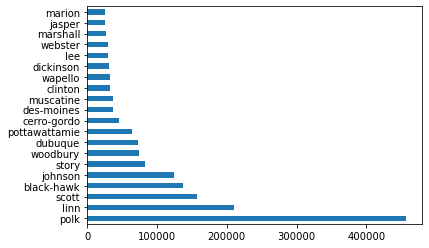

In [80]:
county_sales = df['county'].value_counts().nlargest(20)
county_sales.plot(kind="barh")

### Sabendo que o condado de POLK foi o que vendeu mais, quais cidades do condado de POLK venderam mais?

#### Filtrando as cidades do condado de POLK

In [82]:
polk = df[df['county']=='polk']
polk.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
8163026,S24576000001,2015-03-17,4301.0,Sahota Food Mart,1805 SE 14TH ST,des-moines,50320,"1805 SE 14TH ST\nDES MOINES 50320\n(41.57222, ...",77.0,polk,...,40593.0,new-amsterdam-peach,24.0,375,3.50,5.25,24,$126.00,9.0,2.38
1955517,S17738200008,2014-03-05,4942.0,East Village Pantry,"333, E GRAND AVE",des-moines,50309,"333, E GRAND AVE\nDES MOINES 50309\n(41.590253...",77.0,polk,...,36978.0,nikolai-vodka,6.0,1750,6.92,10.38,6,$62.28,10.5,2.77
3632917,S04651600012,2012-03-20,2534.0,Hy-Vee Drugtown / Urbandale,8601 DOUGLAS,urbandale,50322,"8601 DOUGLAS\nURBANDALE 50322\n(41.629416, -93...",77.0,polk,...,80456.0,ryan-s-cream-liqueur,12.0,750,5.69,9.04,12,$108.48,9.0,2.38
1885376,S07533500014,2012-09-04,2619.0,Hy-Vee Wine and Spirits / WDM,1725 74TH ST,west-des-moines,50266,1725 74TH ST\nWEST DES MOINES 50266\n(41.59851...,77.0,polk,...,17958.0,evan-williams-yr-str-bourbon,6.0,1750,13.40,20.10,6,$120.60,10.5,2.77
9326587,S32613100036,2016-06-01,2536.0,HY-VEE / PLEASANT HILL,4815 Maple Drive,pleasant-hill,50317,4815 Maple Drive\nPleasant Hill 50317\n(41.598...,77.0,polk,...,34821.0,svedka-vodka,6.0,1750,14.74,22.11,6,$132.66,10.5,2.77


#### Quais cidades há no condado de POLK?

In [83]:
polk['city'].unique()

array(['des-moines', 'urbandale', 'west-des-moines', 'pleasant-hill',
       'johnston', 'clive', 'ankeny', 'altoona', 'windsor-heights',
       'grimes', 'polk-city', 'bondurant', 'cambridge', 'mitchellville',
       'runnells', 'swisher'], dtype=object)

#### Em quais cidade do condado de POLK se vendeu mais bebida?

<AxesSubplot:>

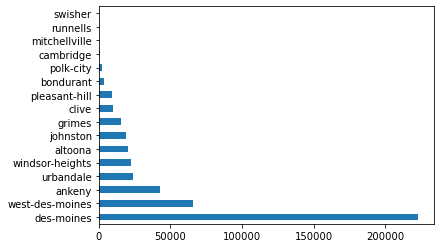

In [84]:
polk['city'].value_counts().plot(kind="barh")

#### Quais cidades no estado do IOWA venderam mais bebida?

<AxesSubplot:>

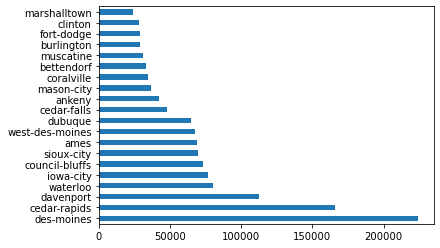

In [85]:
city_sales = df['city'].value_counts().nlargest(20)
city_sales.plot(kind="barh")

#### Filtrando os dados por ano

In [87]:
year_2012 = df[df['date'].dt.year == 2012]
year_2012.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
5373493,S05214700024,2012-04-25,4485.0,DYNO'S 51 / SANBORN,101 W 7TH ST,sanborn,51248,"101 W 7TH ST\nSANBORN 51248\n(43.186036, -95.6...",71.0,o-brien,...,65204.0,tequila-rose-liqueur-mini,6.0,500,6.63,9.95,1,$9.95,0.5,0.13
3778172,S08243700008,2012-10-10,4742.0,No Frills Supermarkets #786 / Counci,"1817, W BROADWAY",council-bluffs,51501,"1817, W BROADWAY\nCOUNCIL BLUFFS 51501\n(41.26...",78.0,pottawattamie,...,57129.0,chi-chi-s-mexican-mudslide,6.0,1750,5.99,9.24,6,$55.44,10.5,2.77
377199,S09758100018,2012-12-28,4161.0,Fareway Stores #950 / Iowa City,2530 WESTWINDS DR,iowa-city,52246,2530 WESTWINDS DR\nIOWA CITY 52246\n(41.650843...,52.0,johnson,...,35626.0,pinnacle-whipped,12.0,750,6.87,10.81,2,$21.62,1.5,0.40
3632917,S04651600012,2012-03-20,2534.0,Hy-Vee Drugtown / Urbandale,8601 DOUGLAS,urbandale,50322,"8601 DOUGLAS\nURBANDALE 50322\n(41.629416, -93...",77.0,polk,...,80456.0,ryan-s-cream-liqueur,12.0,750,5.69,9.04,12,$108.48,9.0,2.38
1885376,S07533500014,2012-09-04,2619.0,Hy-Vee Wine and Spirits / WDM,1725 74TH ST,west-des-moines,50266,1725 74TH ST\nWEST DES MOINES 50266\n(41.59851...,77.0,polk,...,17958.0,evan-williams-yr-str-bourbon,6.0,1750,13.40,20.10,6,$120.60,10.5,2.77


In [88]:
year_2013 = df[df['date'].dt.year == 2013]
year_2013.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
7218066,S16096000036,2013-12-04,4011.0,Jim and Charlies Affiliated,121 NORTH CLINTON,albia,52531,"121 NORTH CLINTON\nALBIA 52531\n(41.028308, -9...",68.0,monroe,...,65066.0,goldschlager-cinnamon-schnapps,12.0,750,12.75,19.13,3,$57.39,2.250000,0.59
3076965,S16476300116,2013-12-23,3818.0,Round Window Liquor,703 W PLEASANT ST,knoxville,50138,703 W PLEASANT ST\nKNOXVILLE 50138\n(41.320746...,63.0,marion,...,43333.0,captain-morgan-spiced-rum-pet,48.0,200,2.01,3.02,3,$9.06,0.600098,0.16
2118559,S14846300029,2013-09-30,3713.0,Wal-Mart 0810 / Mason City,4151 4TH ST SW,mason-city,50401,"4151 4TH ST SW\nMASON CITY 50401\n(43.148239, ...",17.0,cerro-gordo,...,45276.0,paramount-white-rum,12.0,750,4.17,6.26,12,$75.12,9.000000,2.38
5821466,S11288600039,2013-03-26,3390.0,Okoboji Avenue Liquor,1610 OKOBOJI AVENUE,milford,51351,1610 OKOBOJI AVENUE\nMILFORD 51351\n(43.331525...,30.0,dickinson,...,26827.0,jack-daniels-old-7-black-lbl,12.0,1000,16.92,25.37,12,$304.44,12.000000,3.17
1267977,S11425600042,2013-04-03,2200.0,Sac Liquor Store,619 E MAIN ST,sac-city,50583,"619 E MAIN ST\nSAC CITY 50583\n(42.421341, -94...",81.0,sac,...,31658.0,paramount-gin,6.0,1750,7.10,10.65,2,$21.30,3.500000,0.92


In [89]:
year_2014 = df[df['date'].dt.year == 2014]
year_2014.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
2570121,S16904500016,2014-01-20,4970.0,Jeff's Market / West Liberty,"200, E 3RD ST",west-liberty,52776,"200, E 3RD ST\nWEST LIBERTY 52776\n(41.569916,...",70.0,muscatine,...,32236.0,seagrams-extra-dry-gin,12.0,750,5.99,8.99,1,$8.99,0.75,0.20
6275516,S17493700165,2014-02-19,3820.0,"Charlie's Wine and Spirits,",507 W 19th St,sioux-city,51103,"507 W 19th St\nSIOUX CITY 51103\n(42.510535, -...",97.0,woodbury,...,5486.0,macallan-12-yr-single-malt-scotch,12.0,750,28.49,42.74,1,$42.74,0.75,0.20
2275544,S22589500058,2014-11-24,2614.0,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,davenport,52807,1823 E KIMBERLY RD\nDAVENPORT 52807\n(41.55678...,82.0,scott,...,10008.0,scoresby-rare-scotch,6.0,1750,10.50,15.75,6,$94.50,10.50,2.77
2437129,S22081700027,2014-10-29,3947.0,Seaton's Flag Foods,122 A EAST FRONT ST,brooklyn,52211,122 A EAST FRONT ST\nBROOKLYN 52211\n(41.72858...,79.0,poweshiek,...,77776.0,wild-turkey-american-honey,12.0,750,10.50,15.75,3,$47.25,2.25,0.59
1336562,S17215800114,2014-02-04,2544.0,Hy-Vee Food Store / Marshalltown,802 SOUTH CENTER,marshalltown,50158,802 SOUTH CENTER\nMARSHALLTOWN 50158\n(42.0347...,64.0,marshall,...,38177.0,titos-handmade-vodka,12.0,1000,11.92,17.88,6,$107.28,6.00,1.59


In [90]:
year_2015 = df[df['date'].dt.year == 2015]
year_2015.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
2444098,S28594600020,2015-10-22,5155.0,New Star / Ansborough Ave,"1459, ANSBOROUGH AVE",waterloo,50701,"1459, ANSBOROUGH AVE\nWATERLOO 50701\n(42.4930...",7.0,black-hawk,...,53213.0,paul-masson-grande-amber-brandy,24.0,200,1.96,2.94,24,$70.56,4.800781,1.27
3700020,S24315200300,2015-03-03,5104.0,Rustic Lure Wine and Spirits,"72, N OKOBOJI GROVE RD",arnold-s-park,51331,"72, N OKOBOJI GROVE RD\nARNOLD'S PARK 51331\n(...",30.0,dickinson,...,28238.0,bombay-sapphire-gin,6.0,1750,26.22,39.33,1,$39.33,1.750000,0.46
2635918,S28294000028,2015-10-06,4228.0,Fareway Stores #462 / Vinton,501 A AVE,vinton,52349,"501 A AVE\nVINTON 52349\n(42.166166, -92.025603)",6.0,benton,...,43128.0,bacardi-superior-rum,6.0,1750,15.00,22.50,42,$945.00,73.500000,19.42
1222979,S26359200098,2015-06-23,4167.0,"Iowa Street Market, Inc.",1256 IOWA ST,dubuque,52001,"1256 IOWA ST\nDUBUQUE 52001\n(42.504958, -90.6...",31.0,dubuque,...,87510.0,1800-silver-tequila,12.0,750,15.46,23.19,2,$46.38,1.500000,0.40
8163026,S24576000001,2015-03-17,4301.0,Sahota Food Mart,1805 SE 14TH ST,des-moines,50320,"1805 SE 14TH ST\nDES MOINES 50320\n(41.57222, ...",77.0,polk,...,40593.0,new-amsterdam-peach,24.0,375,3.50,5.25,24,$126.00,9.000000,2.38


In [91]:
year_2016 = df[df['date'].dt.year == 2016]
year_2016.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
10449985,INV-01781900012,2016-11-28,5248.0,Liquor and Grocery Depot,"114, N Center St",marshalltown,50158,"114, N Center St\nMarshalltown 50158\n(42.0516...",64.0,marshall,...,65254.0,jagermeister-liqueur,24.0,375,6.52,9.78,8,$9.78,3.00,0.79
10247272,INV-01169000050,2016-10-25,2665.0,Hy-Vee / Waukee,1005 E Hickman Rd,waukee,50263,"1005 E Hickman Rd\nWaukee 50263\n(41.615059, -...",25.0,dallas,...,34821.0,svedka-vodka,6.0,1750,14.74,22.11,1,$132.66,1.75,0.46
8972988,S31622000076,2016-04-05,2565.0,Hy-Vee Food Store / Spencer,819 N GRAND AVE,spencer,51301,"819 N GRAND AVE\nSPENCER 51301\n(43.145897, -9...",21.0,clay,...,19066.0,jim-beam,12.0,750,10.49,15.74,6,$94.44,4.50,1.19
8449013,S30267200008,2016-01-19,4569.0,Car-Go-Express / Sutherland,202 WEST SOUTHERN ST,sutherland,51058,202 WEST SOUTHERN ST\nSUTHERLAND 51058\n(42.96...,71.0,o-brien,...,15248.0,windsor-canadian-pet,6.0,1750,9.18,13.77,6,$82.62,10.50,2.77
10111042,INV-00685900039,2016-10-04,3385.0,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,cedar-rapids,52402,2605 Blairs Ferry Rd NE\nCedar Rapids 52402\n(...,57.0,linn,...,68038.0,bailey-s-original-irish-cream,6.0,1750,25.00,37.50,2,$225.00,3.50,0.92


In [92]:
year_2017 = df[df['date'].dt.year == 2017]
year_2017.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
11761712,INV-05685400007,2017-06-22,5411.0,Bluejay Market,2810 Wills Ave,perry,50220,"2810 Wills Ave\nPerry 50220\n(41.838488, -94.0...",25.0,dallas,...,11786.0,black-velvet-traveler,12.0,750,5.23,7.85,1,$94.20,0.750000,0.19
12283410,INV-07210700002,2017-09-13,4132.0,Camanche Food Pride,908 7th Ave,camanche,52730,"908 7th Ave\nCamanche 52730\n(41.78845, -90.25...",23.0,clinton,...,73051.0,rumchata-mini,12.0,500,8.87,13.31,1,$13.31,0.500000,0.13
11506633,INV-04945500017,2017-05-16,2590.0,Hy-Vee Food Store #5 / Cedar Rapids,3235 Oakland Road NE,cedar-rapids,52402,3235 Oakland Road NE\nCedar Rapids 52402\n(42....,57.0,linn,...,86881.0,southern-comfort-mini,10.0,600,5.65,8.48,1,$8.48,0.600098,0.15
11873222,INV-05995100005,2017-07-10,5087.0,Quik-Pik / Logan,"107, W 7th St",logan,51546,"107, W 7th St\nLogan 51546\n(41.643053, -95.79...",43.0,harrison,...,11290.0,crown-royal-canadian-whisky-mini,10.0,300,7.35,11.03,1,$110.30,0.300049,0.07
11886654,INV-06032300021,2017-07-12,3514.0,Karen's Spirits and Wine,328 2nd Ave S,fort-dodge,50501,"328 2nd Ave S\nFort Dodge 50501\n(42.502311, -...",94.0,webster,...,1799.0,captain-morgan-spiced-barrel,6.0,1750,18.00,27.00,1,$162.00,1.750000,0.46


In [94]:
year1 = [2012,2013,2014,2015,2016,2017]
qtt1 = []
qtt1.append(len(year_2012.index))
qtt1.append(len(year_2013.index))
qtt1.append(len(year_2014.index))
qtt1.append(len(year_2015.index))
qtt1.append(len(year_2016.index))
qtt1.append(len(year_2017.index))
qtt1

[416560, 412958, 419501, 436005, 456400, 376792]

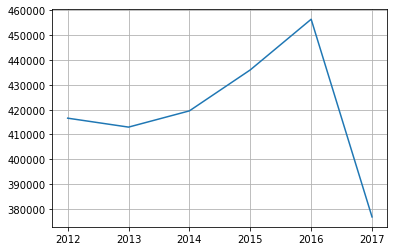

In [99]:
plt.grid(True)
plt.plot(year1, qtt1)

In [100]:
year2 = [2012,2013,2014,2015,2016]
qtt2 = []
qtt2.append(len(year_2012.index))
qtt2.append(len(year_2013.index))
qtt2.append(len(year_2014.index))
qtt2.append(len(year_2015.index))
qtt2.append(len(year_2016.index))
qtt2

[416560, 412958, 419501, 436005, 456400]

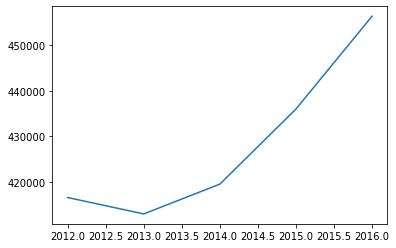

In [101]:
plt.plot(year2, qtt2)
plt.show()

In [104]:
volume_per_month_2012 = year_2012['date']

In [105]:
volume_per_month_2013 = year_2013['date']

In [106]:
volume_per_month_2014 = year_2014['date']

In [107]:
volume_per_month_2015 = year_2015['date']

In [108]:
volume_per_month_2016 = year_2016['date']

In [109]:
volume_per_month_2017 = year_2017['date']

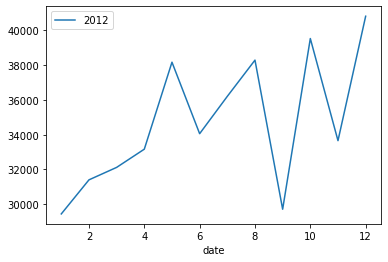

In [136]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().plot(label="2012")
plt.legend()

In [144]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().max()

40821

In [145]:
volume_per_month_2012

5373493   2012-04-25
3778172   2012-10-10
377199    2012-12-28
3632917   2012-03-20
1885376   2012-09-04
             ...    
2651625   2012-01-03
5845818   2012-08-30
5855668   2012-10-01
3903118   2012-11-16
7943325   2012-12-18
Name: date, Length: 416560, dtype: datetime64[ns]

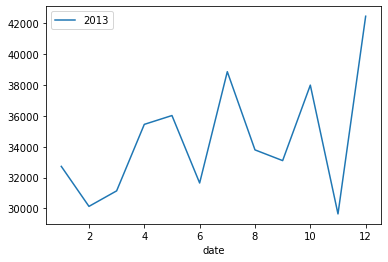

In [137]:
volume_per_month_2013.groupby(volume_per_month_2013.dt.month).count().plot(label="2013")
plt.legend()

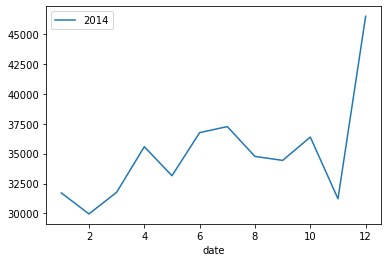

In [138]:
volume_per_month_2014.groupby(volume_per_month_2014.dt.month).count().plot(label="2014")
plt.legend()

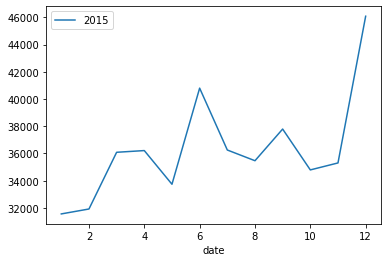

In [139]:
volume_per_month_2015.groupby(volume_per_month_2015.dt.month).count().plot(label="2015")
plt.legend()

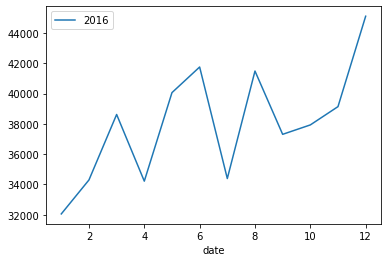

In [141]:
volume_per_month_2016.groupby(volume_per_month_2016.dt.month).count().plot(label="2016")
plt.legend()

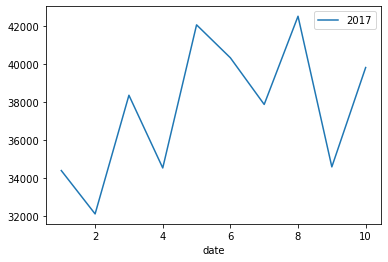

In [143]:
volume_per_month_2017.groupby(volume_per_month_2017.dt.month).count().plot(label="2017")
plt.legend()